In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

basic= pd.read_csv(r"C:\Users\ttjrb\OneDrive\Desktop\University Important\summer 2024 work\projects\databases\ALL 1320 nba games 2022-23\basic.csv",usecols=('name','SEC','FGpct','3PM','3Ppct','FTM','FTpct','ORB','TRB','AST','STL','BLK','TOV','PTS','plusminusPTS'))
advanced=pd.read_csv(r"C:\Users\ttjrb\OneDrive\Desktop\University Important\summer 2024 work\projects\databases\ALL 1320 nba games 2022-23\advanced.csv",usecols=('USGpct','DEFRTG'))

In [27]:
df=pd.concat([basic,advanced], axis=1)

playerNames= df['name'].unique()
len(playerNames)

dfTemp=df.set_index('name')

eligiblePlayersList=[]
statsCategoriesList= dfTemp.columns
resultList=[]
for player in playerNames:
    iteration= dfTemp.loc[player]
    if len(iteration)>58:
        eligiblePlayersList.append(player)
        avg= iteration.mean()
        playerStatsList=[]      
        for i in range(len(statsCategoriesList)):
            playerStatsList.append(avg[statsCategoriesList[i]])            
        playerDict={}
        for i in range(len(statsCategoriesList)):
            playerDict[statsCategoriesList[i]]= playerStatsList[i]
        resultList.append(playerDict)

playersAvg=pd.DataFrame(resultList)
playersAvg.insert(0,'name',eligiblePlayersList)

def topKLeader(category,K):
    statsSorted=playersAvg.sort_values(category,ascending=False)
    statsForVisualization= statsSorted.head(K)[category]
    namesForVisualization= statsSorted.head(K)['name']

    plt.bar(namesForVisualization, statsForVisualization,width=0.3)
    plt.title('Top '+ str(K)+'  '+category+' players in the NBA 2022/23')
    plt.xlabel('players')
    plt.ylabel(category)
    plt.show()

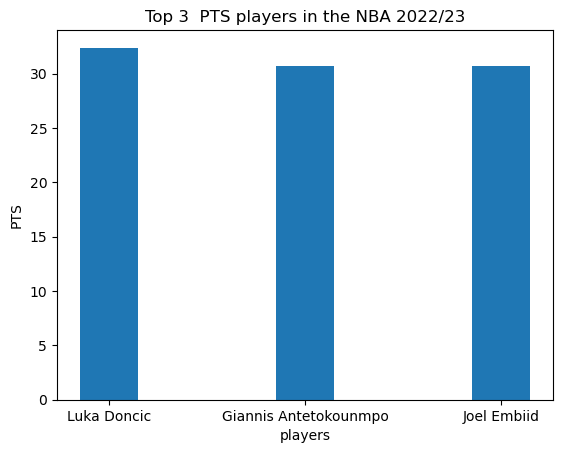

In [6]:
par1= input('what category leaders do you need?')
par2=int(input('how many leader do you need'))
topKLeader(par1, par2)

In [ ]:
#........................Step by Step process..........................................................................................................

In [13]:
df=pd.concat([basic,advanced], axis=1)
df=df[pd.notnull(df["SEC"])]
playersAvg= df.groupby("name").count()
playersAvg

,SEC,FGpct,3PM,3Ppct,FTM,FTpct,ORB,TRB,AST,STL,BLK,TOV,PTS,plusminusPTS,DEFRTG,USGpct
name,,,,,,,,,,,,,,,,
A.J. Lawson,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
AJ Green,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
AJ Griffin,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
Aaron Gordon,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
Aaron Holiday,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
Zach LaVine,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
Zeke Nnaji,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58


In [25]:
#concatenate boths dataframes row-wise to make the work easier

df=pd.concat([basic,advanced], axis=1)

In [26]:
df

,name,SEC,FGpct,3PM,3Ppct,FTM,FTpct,ORB,TRB,AST,STL,BLK,TOV,PTS,plusminusPTS,DEFRTG,USGpct
0,Jaylen Brown,2314.0,0.583,4,0.333,3,1.000,0,3,2,2,1,4,35,7,119.2,0.354
1,Jayson Tatum,2317.0,0.650,2,0.286,7,0.778,0,12,4,1,1,3,35,10,111.4,0.321
2,Al Horford,1386.0,0.286,2,0.400,0,0.000,1,5,1,0,0,0,6,8,126.1,0.140
3,Derrick White,1442.0,0.333,0,0.000,0,0.000,1,3,4,1,0,1,2,9,107.5,0.069
4,Marcus Smart,2165.0,0.375,1,0.250,7,0.875,1,3,7,1,0,1,14,0,121.3,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34019,Lindy Waters III,979.0,0.286,1,0.167,0,0.000,2,2,2,1,0,2,5,-8,114.3,0.205
34020,Aaron Wiggins,903.0,0.667,0,0.000,0,0.000,1,2,0,0,0,0,4,-6,123.3,0.086
34021,Ousmane Dieng,430.0,0.400,0,0.000,0,0.000,0,2,0,0,0,0,4,1,73.3,0.333
34022,Tre Mann,311.0,0.000,0,0.000,0,0.000,0,1,1,0,0,3,0,0,90.0,0.273


In [11]:
#getting the name of every single NBA player of the season and adding to a list

playerNames= df['name'].unique()
len(playerNames)

548

In [19]:
#setting players names as index temporarily to ease the work
dfTemp=df.set_index('name')
dfTemp

,SEC,FGpct,3PM,3Ppct,FTM,FTpct,ORB,TRB,AST,STL,BLK,TOV,PTS,plusminusPTS,DEFRTG,USGpct
name,,,,,,,,,,,,,,,,
Jaylen Brown,2314.0,0.583,4,0.333,3,1.000,0,3,2,2,1,4,35,7,119.2,0.354
Jayson Tatum,2317.0,0.650,2,0.286,7,0.778,0,12,4,1,1,3,35,10,111.4,0.321
Al Horford,1386.0,0.286,2,0.400,0,0.000,1,5,1,0,0,0,6,8,126.1,0.140
Derrick White,1442.0,0.333,0,0.000,0,0.000,1,3,4,1,0,1,2,9,107.5,0.069
Marcus Smart,2165.0,0.375,1,0.250,7,0.875,1,3,7,1,0,1,14,0,121.3,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lindy Waters III,979.0,0.286,1,0.167,0,0.000,2,2,2,1,0,2,5,-8,114.3,0.205
Aaron Wiggins,903.0,0.667,0,0.000,0,0.000,1,2,0,0,0,0,4,-6,123.3,0.086
Ousmane Dieng,430.0,0.400,0,0.000,0,0.000,0,2,0,0,0,0,4,1,73.3,0.333


In [23]:
#Iterating the players and finding their average stats for the season

eligiblePlayersList=[]
statsCategoriesList= dfTemp.columns
resultList=[]
#iterating each player
for player in playerNames:
    iteration= dfTemp.loc[player]
#determining if he is eligible
    if len(iteration)>58:
        eligiblePlayersList.append(player)
#finding the average stats of the player
        avg= iteration.mean()
        playerStatsList=[]
#appending the player's stats to his list (respective of categories and in order)        
        for i in range(len(statsCategoriesList)):
            playerStatsList.append(avg[statsCategoriesList[i]])
#creating the player's dictionary for his entry in the result list, key= stat category, value= his average stats            
        playerDict={}
        for i in range(len(statsCategoriesList)):
            playerDict[statsCategoriesList[i]]= playerStatsList[i]
        resultList.append(playerDict)

        

In [16]:
#Converting the final result list of dictionaries to a dataframe and adding back the names of players who are eligible for ranking
playersAvg=pd.DataFrame(resultList)
playersAvg.insert(0,'name',eligiblePlayersList)

#Yessss!!! we did it
playersAvg

,name,SEC,FGpct,3PM,3Ppct,FTM,FTpct,ORB,TRB,AST,STL,BLK,TOV,PTS,plusminusPTS,DEFRTG,USGpct
0,Jaylen Brown,2176.632184,0.487761,2.306818,0.328420,3.568182,0.689636,1.170455,6.488636,3.409091,1.090909,0.386364,2.988636,25.420455,3.386364,110.380682,0.296852
1,Jayson Tatum,2253.978723,0.460160,3.117021,0.331777,6.925532,0.839043,1.106383,9.138298,4.755319,1.053191,0.765957,2.861702,29.446809,5.840426,110.455319,0.313319
2,Al Horford,1834.795181,0.435174,2.011628,0.395884,0.209302,0.118221,1.197674,6.197674,2.883721,0.604651,1.104651,0.558140,8.709302,4.279070,106.756977,0.113593
3,Derrick White,1713.235294,0.459010,1.950980,0.373461,1.950980,0.593696,0.637255,3.450980,3.558824,0.647059,0.941176,1.107843,12.588235,4.813725,109.400980,0.172069
4,Marcus Smart,1952.456790,0.437210,1.962963,0.324235,1.728395,0.451383,0.827160,3.345679,5.962963,1.456790,0.345679,2.320988,12.358025,3.567901,111.413580,0.178049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Pat Connaughton,1413.338462,0.375657,1.791045,0.326343,0.447761,0.192791,0.805970,4.522388,1.253731,0.611940,0.179104,0.522388,7.671642,1.686567,108.780597,0.129224
350,Moritz Wagner,1167.842105,0.439194,0.822581,0.259677,2.467742,0.575758,1.112903,4.177419,1.354839,0.596774,0.209677,1.096774,9.677419,-0.435484,101.337097,0.185016
351,Markelle Fultz,1777.966667,0.507833,0.450000,0.192217,1.866667,0.611450,1.150000,3.900000,5.683333,1.450000,0.433333,2.316667,13.950000,-2.166667,113.806667,0.208183
352,Bogdan Bogdanovic,1663.704918,0.455806,2.629032,0.404968,1.145161,0.447000,0.403226,2.983871,2.693548,0.822581,0.370968,1.096774,13.709677,1.451613,113.506452,0.189161


In [34]:
#showing the top leaders graphically
def topKLeader(category,K):
#Using the stat category and the K number of players asked by the user
    statsSorted=playersAvg.sort_values(category,ascending=False)
    statsForVisualization= statsSorted.head(K)[category]
    namesForVisualization= statsSorted.head(K)['name']

#drawing the bar chart
    plt.bar(namesForVisualization, statsForVisualization,width=0.2)
    plt.title('Top '+ str(K)+'  '+category+' players in the NBA 2022/23')
    plt.xlabel('players')
    plt.ylabel(category)
    plt.show()


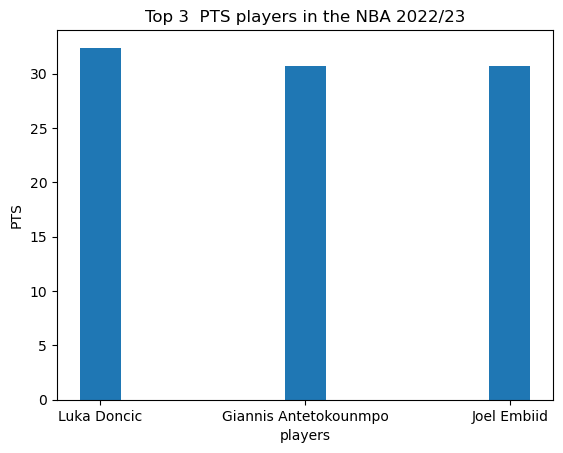

In [40]:
#Finding top 3 scorers in the NBA
topKLeader('PTS',3)

In [ ]:
#par1= input('what category leaders do you need?')
#par2=int(input('how many leader do you need'))
#topKLeader(par1, par2)